<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Contraception_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

<font color='white'> <div style="text-align: justifie"> **To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**</p></font>

<font color='white'> <div style="text-align: justifie">**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.</div>

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

 <font color='white'>**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Source
Explain where did you get the data. How can you trust this data? Who produced this data and what were their motiviations?


# Data Cleaning
In this step you will prepare your data for analysis.

## Review data types
Inspect the dataset for the data types of each column.

## Analytical Transformations
Perform any transformation on the columns in the dataset to enable further analysis.

### Treatment of Missing Values
If there are any missing values, how do you plan to treat those data columns?

# Data Analysis
Explore the dataset to discover relationships between records or columns and patterns within the data.

## Descriptive Statistical Analysis
Using basic statistical measures such as measurements of central tendancy such as mean, median and mode.

### Distribution of Variables
Identify the distribution of the data to understand the range of values and how the data is structured.

### Outliers in the dataset
Identify if there are any outliers in the dataset based on statistical measures.

# Reflections
## Summary of Data Analysis
- What insights should the user takeaway from EDA.

## Questions unanswered
- What aspects of the research question were we unable to answer and why?

## Recommendations
- What should the reader do next with this information?

## Next Steps
- What will the analyst do next based on the analysis?

# I. PACKAGES

In [1]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# II. DATA CLEANING

## 1. LOAD DATA

In [2]:
df = pd.read_excel("capsproject.xlsx")

In [3]:
# display fisrt five rows
df.head()

Respondent's current age               Region Type of place of residence Highest educational level  Religion  Number of household members  \
0                        31                  Sud                      Rural                   Primary  Catholic                            4   
1                        38                  Sud                      Rural                    Higher  Catholic                            5   
2                        35                  Sud                      Rural                 Secondary  Catholic                            6   
3                        37                  Sud                      Rural                 Secondary  Catholic                            7   
4                        38  Aire Metropolitaine                      Urban                 Secondary  Catholic                            7   

   Number of children 5 and under in household Wealth index combined  Age of respondent at 1st birth Knowledge of ovulatory cycle  \
0                                            2                Middle                              19           After period ended   
1                                            1                Middle                              31          Middle of the cycle   
2                                            0                Middle                              23           After period ended   
3                                            1                Poorer                              18           After period ended   
4                                            0               Richest                              21           After period ended   

   Number of living children Current contraceptive method Current use by method type At health facility, told of family planning  \
0                          3                    Not using                  No method                                          No   
1                          2                   Injections              Modern method                                          No   
2                          2                   Injections              Modern method                                          No   
3                          5                   Injections              Modern method                                          No   
4                          3                    Not using                  No method                                          No   

  Contraception is woman's business, man should not worry Women who use contraception become promiscuous  Age at first cohabitation  \
0                                           Disagree                                            Disagree                         27   
1                                              Agree                                            Disagree                         29   
2                                           Disagree                                            Disagree                         22   
3                                              Agree                                               Agree                         18   
4                                           Disagree                                            Disagree                         20   

   Years since first cohabitation Fertility preference       Husband/partner's occupation Respondent currently working  Husband/partner's age  \
0                               4              No more  Professional/technical/managerial                          Yes                     31   
1                               8              No more  Professional/technical/managerial                          Yes                     39   
2                              12         Have another                     Skilled manual                          Yes                     42   
3                              19              No more       Agricultural - self employed                           No                     53   
4         

In [4]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

## 2. OVERVIEW

In [5]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of rows: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print(df.columns)
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [6]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  1878

Number of features: 24

Data Features:
Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

Missing values: 0

Unique values:
Respondent_s_current_age  

In [7]:
df.shape

(1878, 24)

In [8]:
# Check for duplicated columns
df[df.duplicated()].sum()

Respondent_s_current_age                     0.00
Region                                       0.00
Type_of_place_of_residence                   0.00
Highest_educational_level                    0.00
Religion                                     0.00
                                             ... 
Husband_partner_s_occupation                 0.00
Respondent_currently_working                 0.00
Husband_partner_s_age                        0.00
Respondent_earns_more_than_husband_partner   0.00
Total_lifetime_number_of_sex_partners        0.00
Length: 24, dtype: float64

In [9]:
# Check null values
df.isnull().sum()

Respondent_s_current_age                      0
Region                                        0
Type_of_place_of_residence                    0
Highest_educational_level                     0
Religion                                      0
                                             ..
Husband_partner_s_occupation                  0
Respondent_currently_working                  0
Husband_partner_s_age                         0
Respondent_earns_more_than_husband_partner    0
Total_lifetime_number_of_sex_partners         0
Length: 24, dtype: int64

In [10]:
# Check for variable info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 24 columns):
 #   Column                                                  Non-Null Count  Dtype 
---  ------                                                  --------------  ----- 
 0   Respondent_s_current_age                                1878 non-null   int64 
 1   Region                                                  1878 non-null   object
 2   Type_of_place_of_residence                              1878 non-null   object
 3   Highest_educational_level                               1878 non-null   object
 4   Religion                                                1878 non-null   object
 5   Number_of_household_members                             1878 non-null   int64 
 6   Number_of_children_5_and_under_in_household             1878 non-null   int64 
 7   Wealth_index_combined                                   1878 non-null   object
 8   Age_of_respondent_at_1st_birth                  

In [11]:
# count column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

Respondent_s_current_age = 32
Region = 11
Type_of_place_of_residence = 2
Highest_educational_level = 4
Religion = 3
Number_of_household_members = 16
Number_of_children_5_and_under_in_household = 7
Wealth_index_combined = 5
Age_of_respondent_at_1st_birth = 29
Knowledge_of_ovulatory_cycle = 5
Number_of_living_children = 12
Current_contraceptive_method = 5
Current_use_by_method_type = 2
At_health_facility_told_of_family_planning = 2
Contraception_is_woman_s_business_man_should_not_worry = 2
Women_who_use_contraception_become_promiscuous = 3
Age_at_first_cohabitation = 32
Years_since_first_cohabitation = 35
Fertility_preference = 2
Husband_partner_s_occupation = 6
Respondent_currently_working = 2
Husband_partner_s_age = 45
Respondent_earns_more_than_husband_partner = 3
Total_lifetime_number_of_sex_partners = 13


In [12]:
# make changes in target columns
df["Use_method"] = df["Current_use_by_method_type"].replace({'Modern method':'Yes', 'No method':'No'})

#III. ANALYSIS

##1. DESCRITIVE ANALYSIS

In [13]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

<font color='pink'>**Contraceptive prevalence of married women who are not currently pregnant**</font>

<font color='red'>bar</font>

In [14]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Use_method"].value_counts(), plot_title="Distribution of married women by modern contraceptive method(MCM)")

In [15]:
# Show categoric variable
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Current_contraceptive_method',
 'Current_use_by_method_type',
 'At_health_facility_told_of_family_planning',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Fertility_preference',
 'Husband_partner_s_occupation',
 'Respondent_currently_working',
 'Respondent_earns_more_than_husband_partner',
 'Use_method']

In [16]:
# Descriptive Analysis of qualitative variables
descat = df.describe(include=[object]).T
descat['%'] = descat['freq']/descat['count']*100
descat

count unique                           top  freq     %
Region                                              1878     11                    Artibonite   208 11.08
Type_of_place_of_residence                          1878      2                         Rural  1302 69.33
Highest_educational_level                           1878      4                       Primary   757 40.31
Religion                                            1878      3                    Protestant   968 51.54
Wealth_index_combined                               1878      5                       Poorest   493 26.25
Knowledge_of_ovulatory_cycle                        1878      5            After period ended  1131 60.22
Current_contraceptive_method                        1878      5                     Not using  1162 61.87
Current_use_by_method_type                          1878      2                     No method  1162 61.87
At_health_facility_told_of_family_planning          1878      2                            No  1453 77.37
Contraception_is_woman_s_business_man_should_no...  1878      2                      Disagree  1515 80.67
Women_who_use_contraception_become_promiscuous      1878      3                      Disagree  1312 69.86
Fertility_preference                                1878      2                       No more  1332 70.93
Husband_partner_s_occupation                        1878      6  Agricultural - self employed   871 46.38
Respondent_currently_working                        1878      2                           Yes  1504 80.09
Respondent_earns_more_than_husband_partner          1878      3                 Less than him  1203 64.06
Use_method                                          1878      2                            No  1162 61.87

In [17]:
def custo(x):

      """
    This function is created in order to make univariate analysis
    It creates barplot to show distribution of married woman from a frequencies table

      """
    # Frequences table
      custo = pd.DataFrame(df.groupby(x)[['Use_method']].count())

      ax1 = plt.figure(figsize=(18,12))
      plt.bar(custo.index, custo['Use_method'] ,color = ['coral','grey','red'], edgecolor="black")
      plt.title('Distribution of of married women by '+ x,size=12)

    # Show the proportions
      for i in range(len(custo['Use_method'])):
        plt.text(i,0.1, str(round(custo['Use_method'].values[i]/df.shape[0], 2)*100)+"%", fontsize =12, horizontalalignment='center', verticalalignment='baseline')
      plt.show
    #Save the graph
      plt.savefig('Distribution of married women by '+ x + ".png")
      return custo

Use_method
Region                         
Aire Metropolitaine         187
Artibonite                  208
Centre                      154
Grand'Anse                  157
Nippes                      134
Nord                        172
Nord-Est                    157
Nord-Ouest                  199
Rest-Ouest                  205
Sud                         167
Sud-Est                     138

Use_method
Type_of_place_of_residence            
Rural                             1302
Urban                              576

Use_method
Highest_educational_level            
Higher                             56
No education                      500
Primary                           757
Secondary                         565

Use_method
Religion               
Catholic            795
No religion         115
Protestant          968

Use_method
Wealth_index_combined            
Middle                        368
Poorer                        433
Poorest                       493
Richer                        319
Richest                       265

Use_method
Knowledge_of_ovulatory_cycle            
After period ended                  1131
At any time                          150
Before period begins                 204
During her period                     23
Middle of the cycle                  370

Use_method
Current_contraceptive_method            
Implants/Norplant                     74
Injections                           518
Male condom                           63
Not using                           1162
Pill                                  61

Use_method
Current_use_by_method_type            
Modern method                      716
No method                         1162

Use_method
At_health_facility_told_of_family_planning            
No                                                1453
Yes                                                425

Use_method
Contraception_is_woman_s_business_man_should_no...            
Agree                                                      363
Disagree                                                  1515

Use_method
Women_who_use_contraception_become_promiscuous            
Agree                                                  562
Disagree                                              1312
Don't know                                               4

Use_method
Fertility_preference            
Have another                 546
No more                     1332

Use_method
Husband_partner_s_occupation                 
Agricultural - self employed              871
Household and domestic                     37
Professional/technical/managerial         255
Sales                                     337
Skilled manual                            356
Unskilled manual                           22

Use_method
Respondent_currently_working            
No                                   374
Yes                                 1504

Use_method
Respondent_earns_more_than_husband_partner            
About the same                                     434
Less than him                                     1203
More than him                                      241

Use_method
Use_method            
No                1162
Yes                716

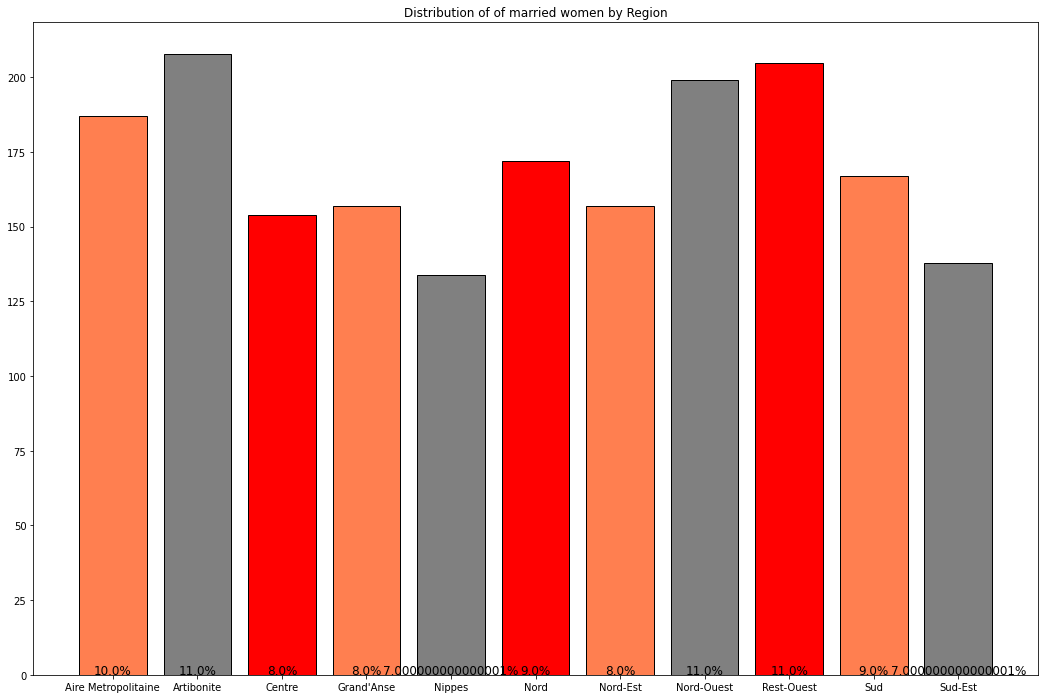

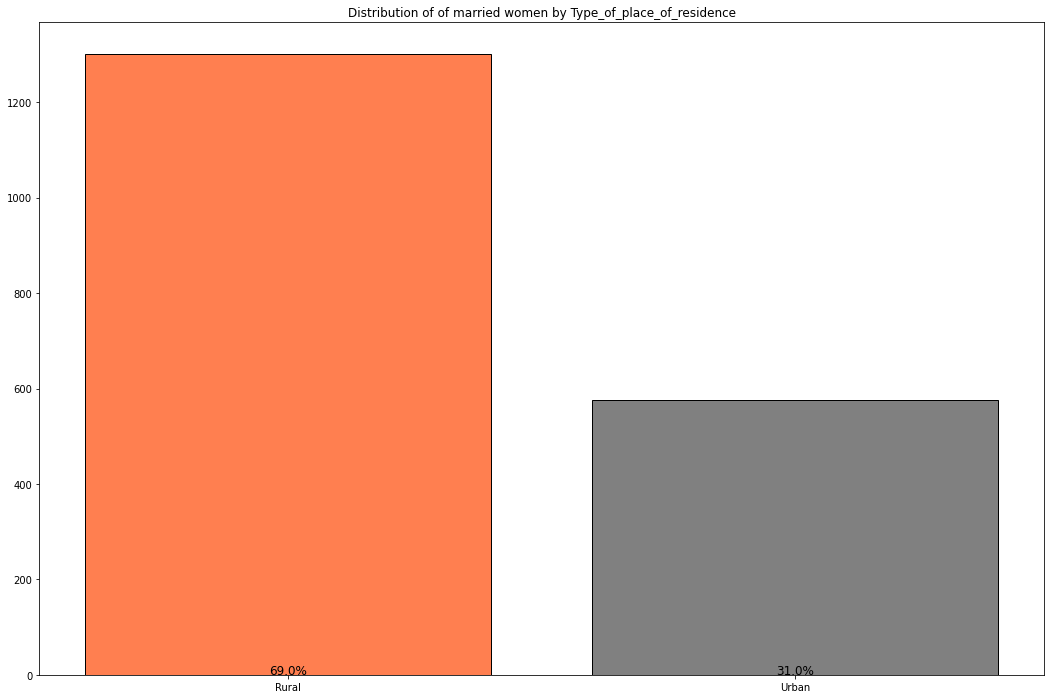

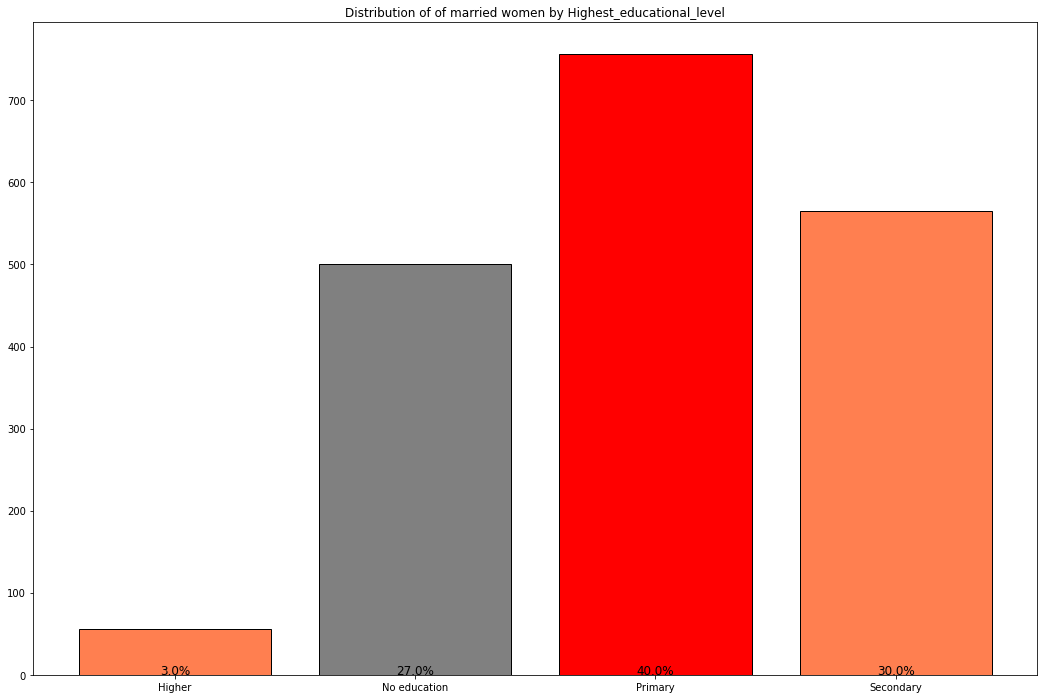

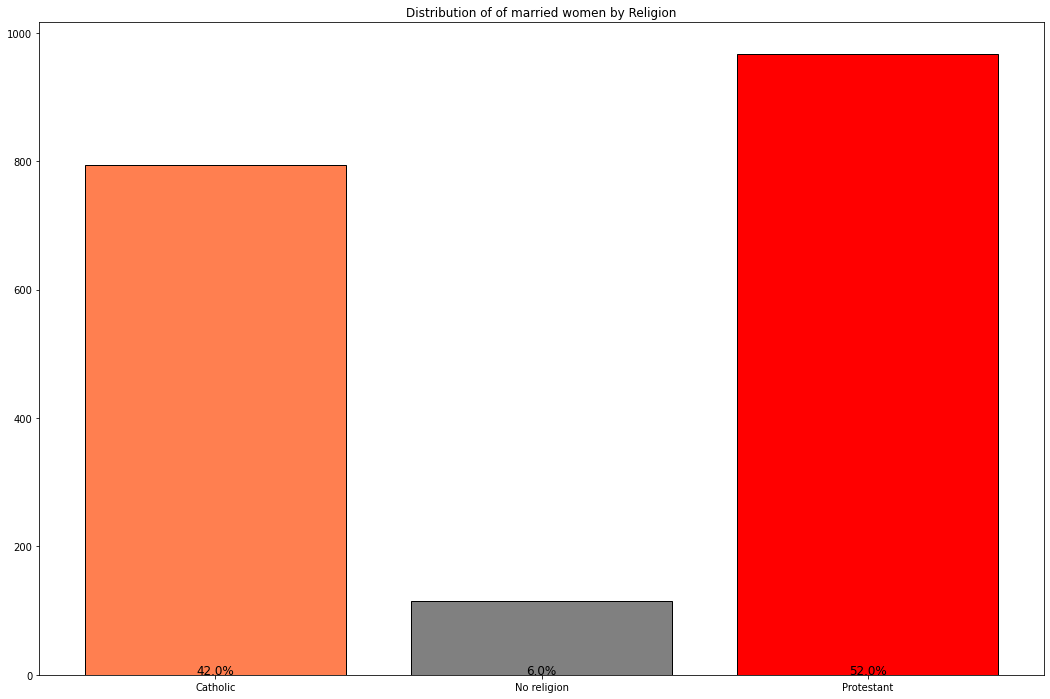

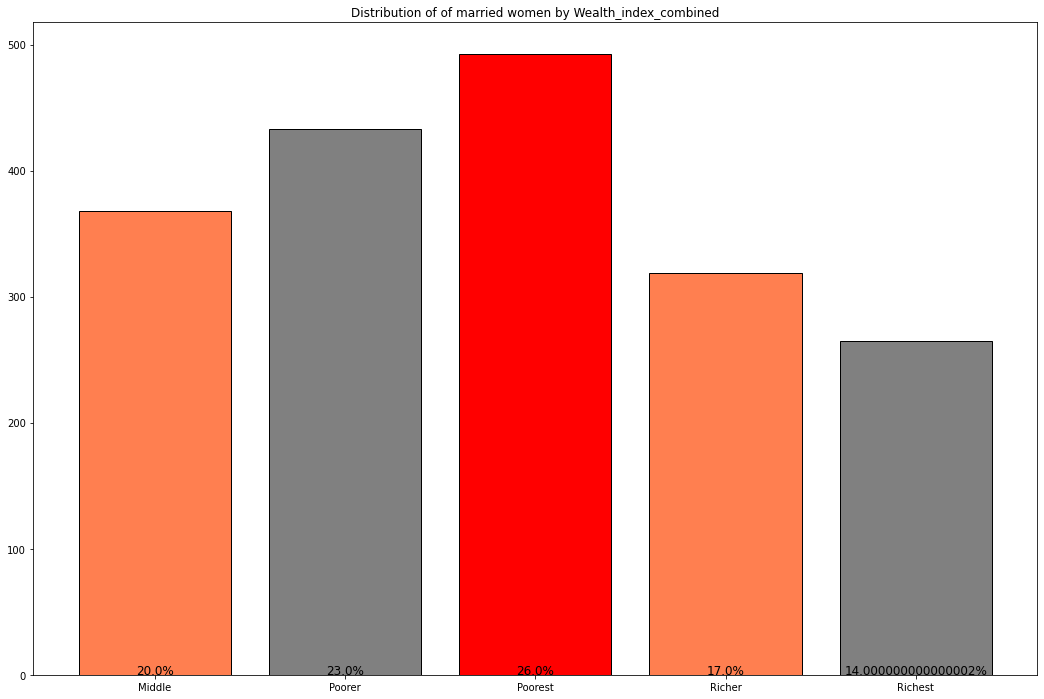

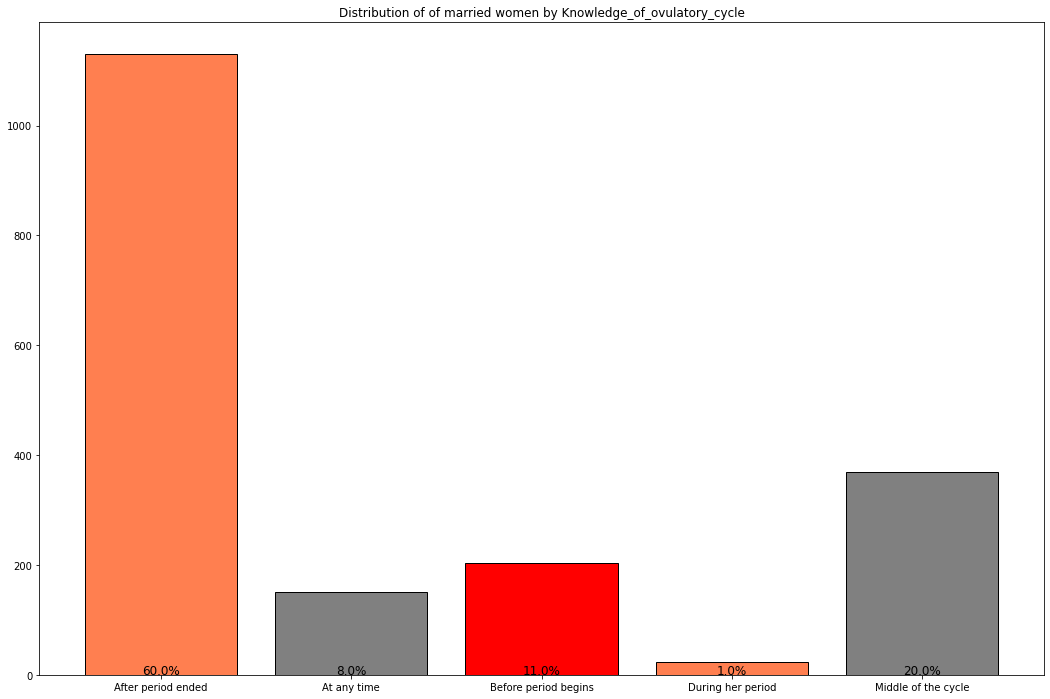

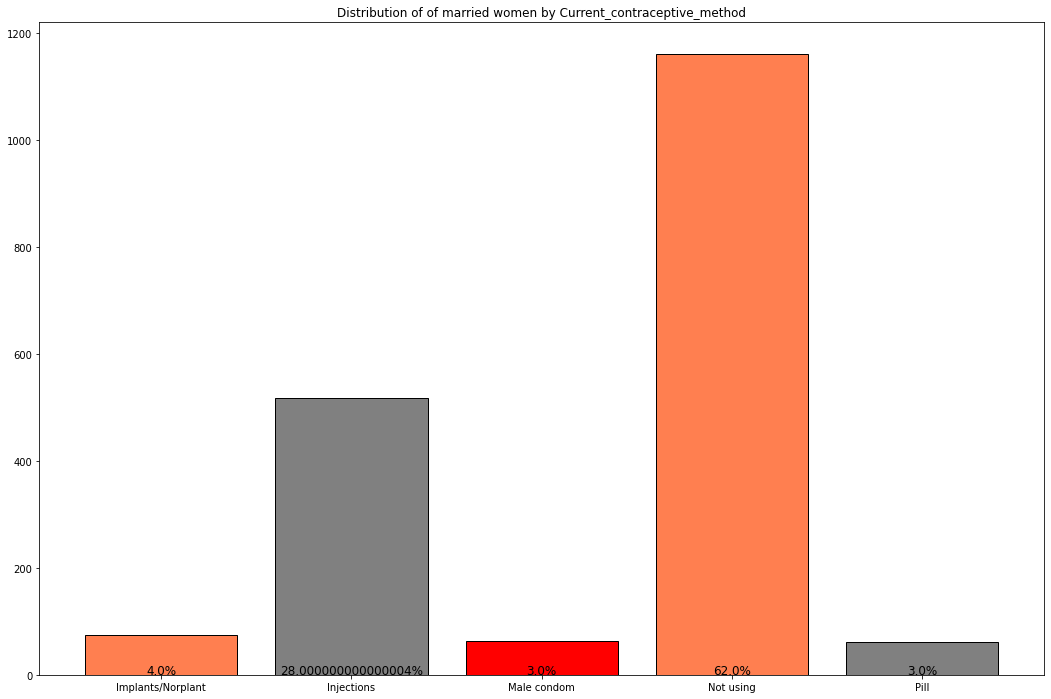

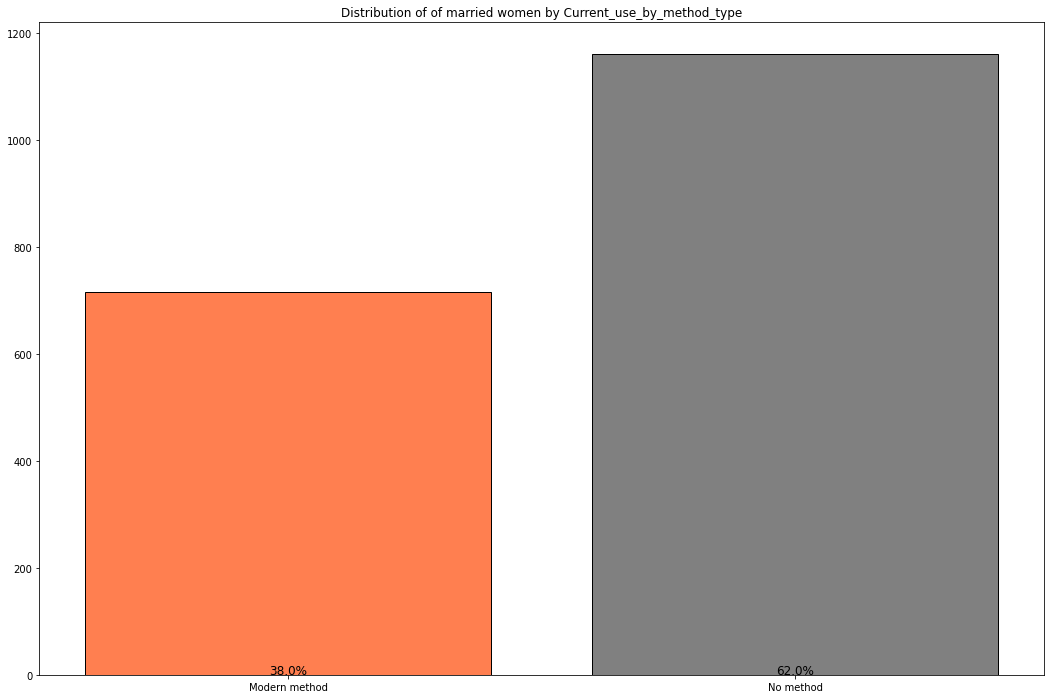

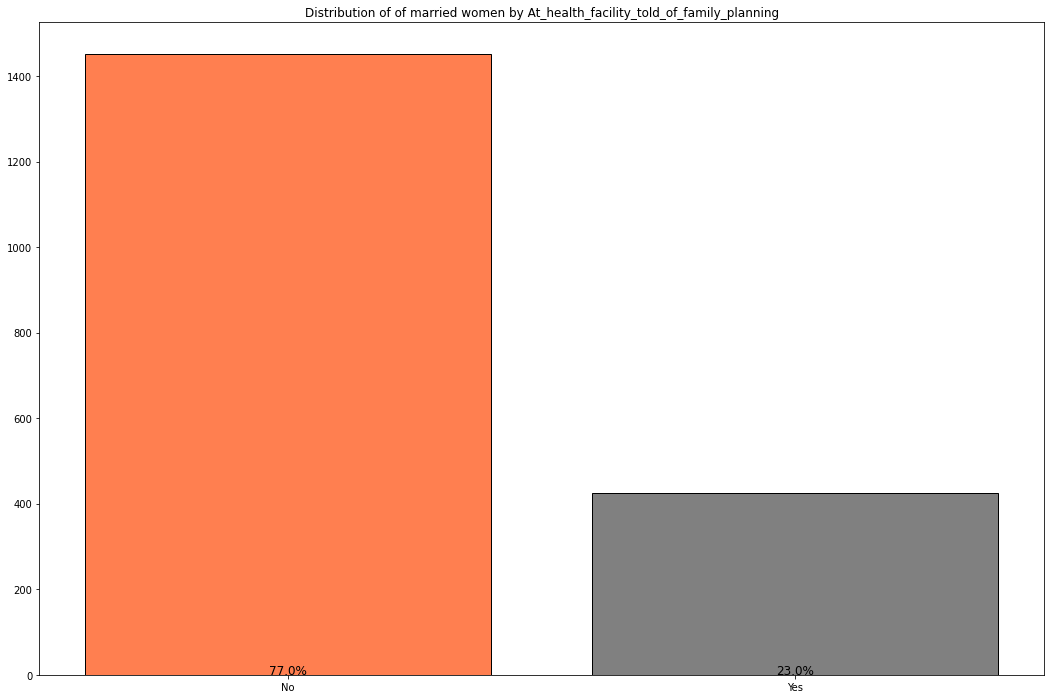

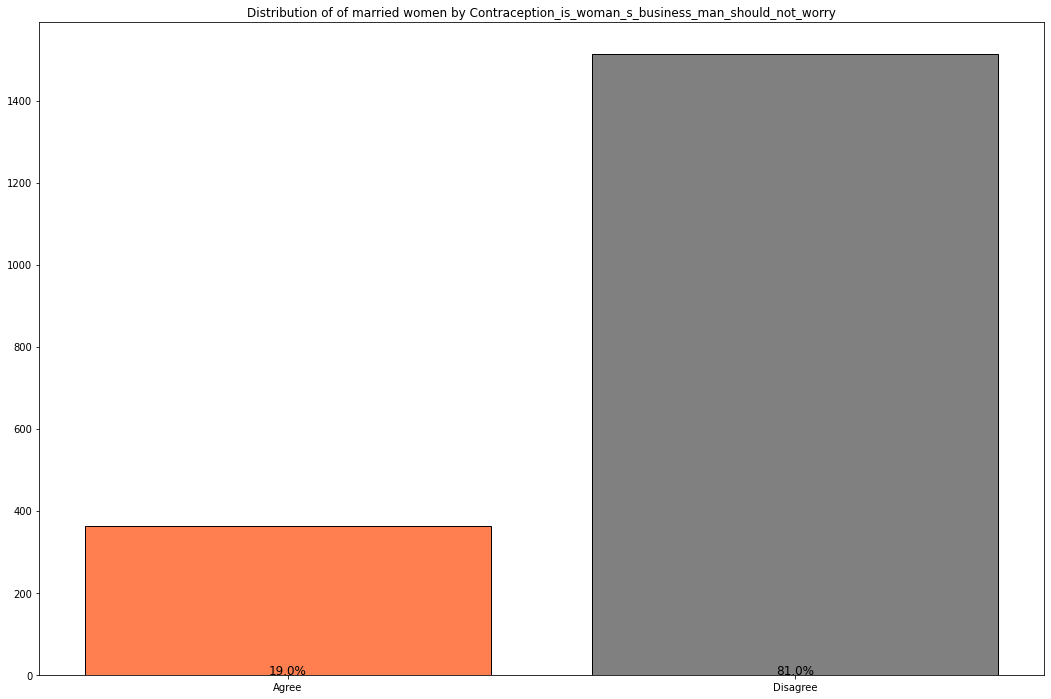

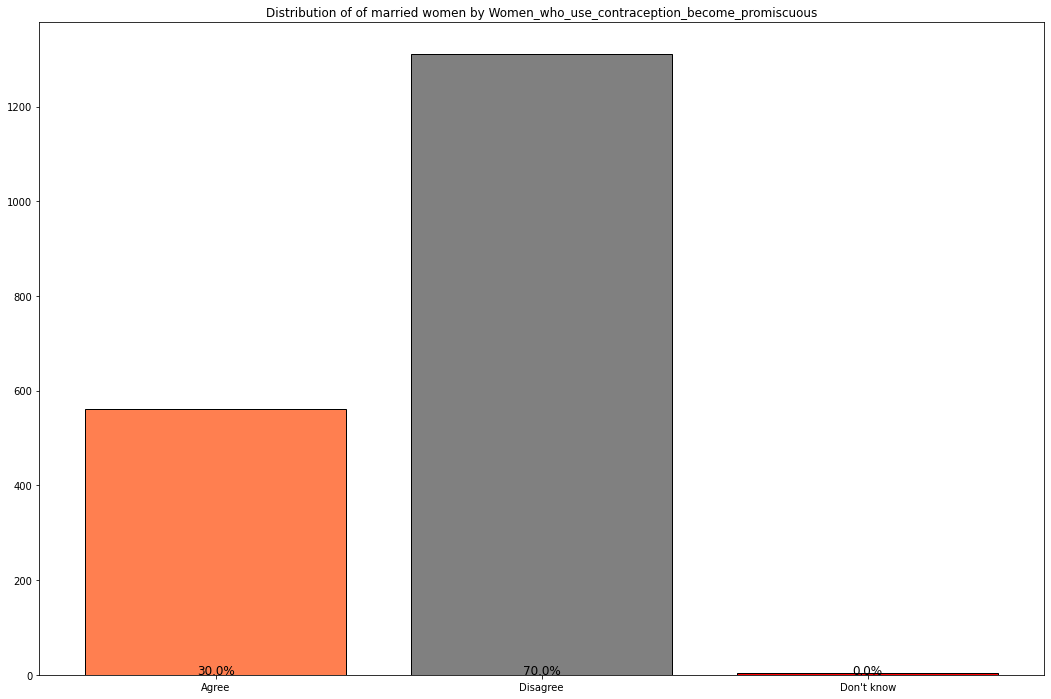

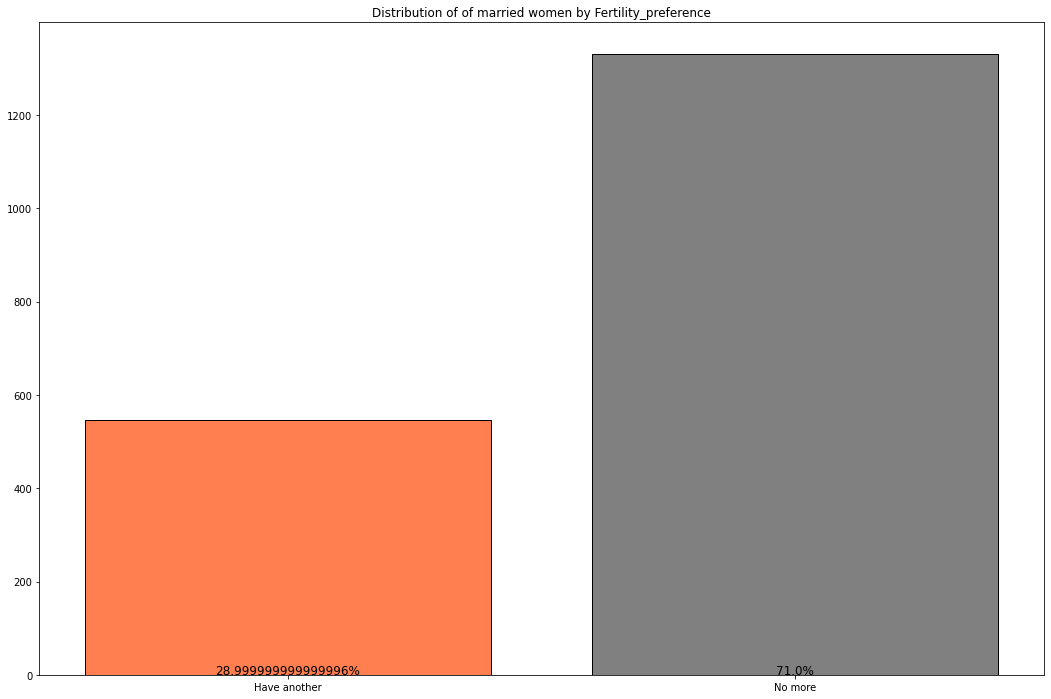

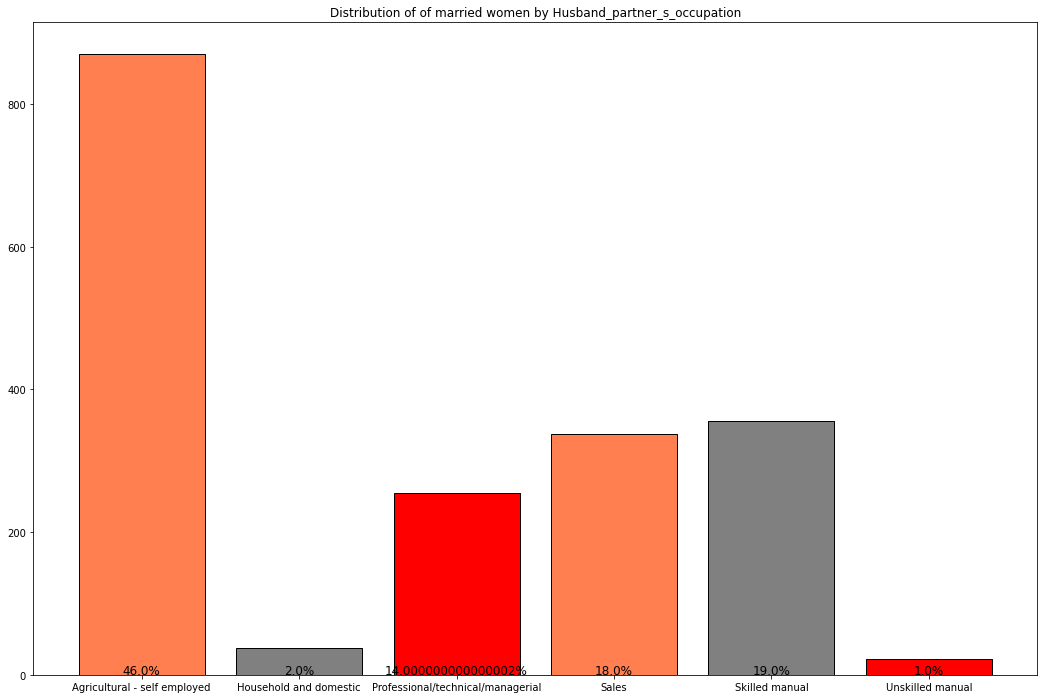

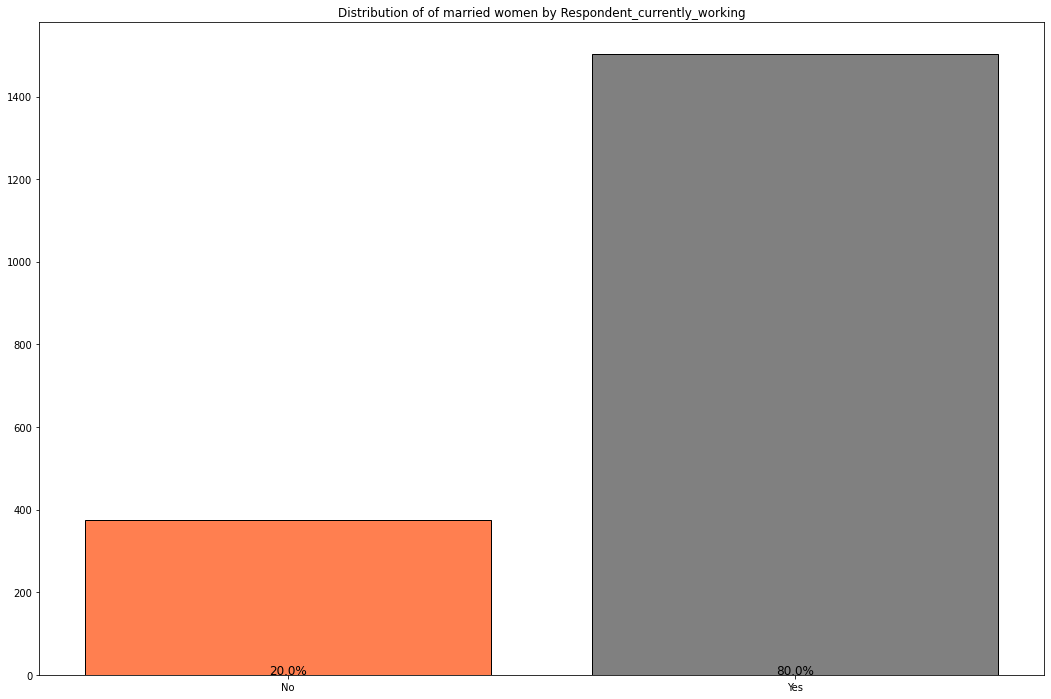

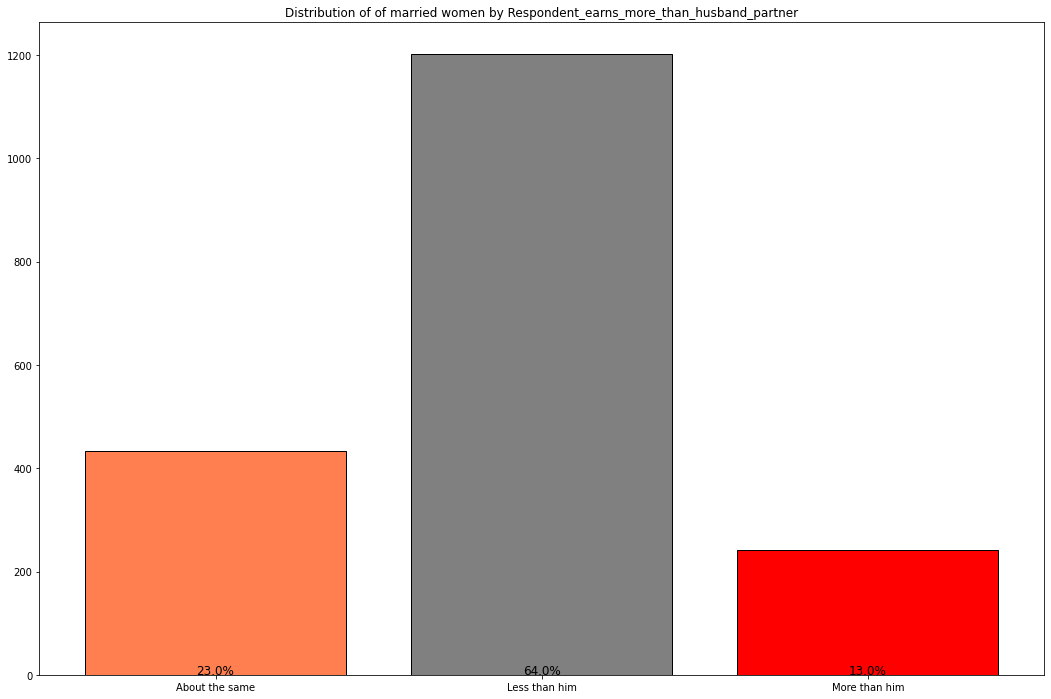

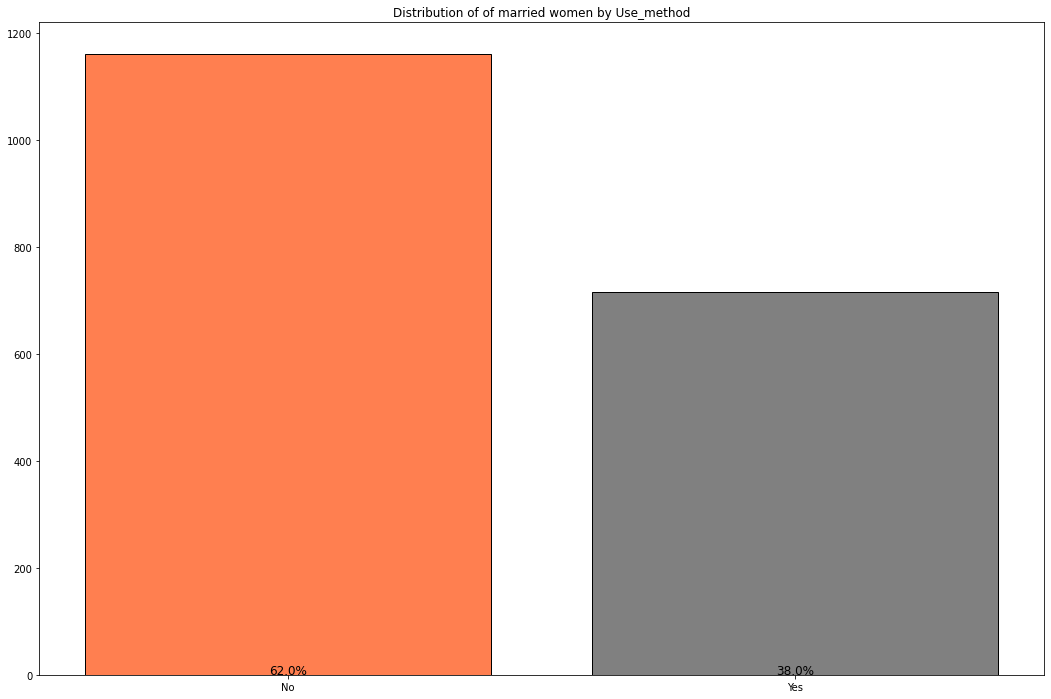

In [18]:
# Let's plot categoric variable
for col in cat_cols:
  display(custo(col))

In [19]:
# Descriptive Analysis of numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [20]:
df.describe(include=[np.number]).T

count  mean  std   min   25%   50%   75%   max
Respondent_s_current_age                    1878.00 34.83 7.71 18.00 29.00 35.00 41.00 49.00
Number_of_household_members                 1878.00  5.70 2.19  2.00  4.00  5.00  7.00 19.00
Number_of_children_5_and_under_in_household 1878.00  1.02 0.91  0.00  0.00  1.00  2.00  7.00
Age_of_respondent_at_1st_birth              1878.00 20.89 4.40 11.00 18.00 20.00 23.00 39.00
Number_of_living_children                   1878.00  3.43 2.12  1.00  2.00  3.00  5.00 12.00
Age_at_first_cohabitation                   1878.00 20.93 4.76 10.00 18.00 20.00 24.00 42.00
Years_since_first_cohabitation              1878.00 13.44 7.93  0.00  7.00 13.00 19.00 34.00
Husband_partner_s_age                       1878.00 40.38 9.07 20.00 33.00 40.00 47.00 64.00
Total_lifetime_number_of_sex_partners       1878.00  2.27 1.55  1.00  1.00  2.00  3.00 22.00

* Let's plot histogram for numeric variable

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6671e238d0>,
      dtype=object)

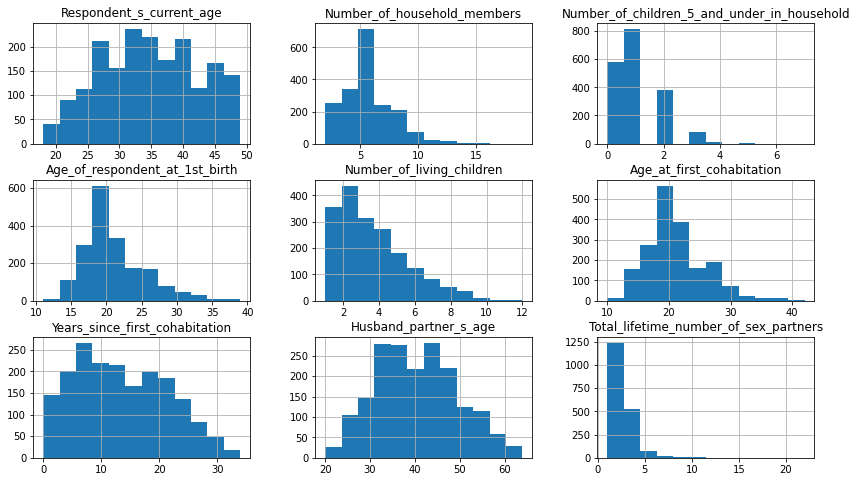

In [21]:
# Let's plot numeric variable
df[num_cols].hist(figsize = (14,8), bins=12)

AxesSubplot(0.125,0.125;0.775x0.755)


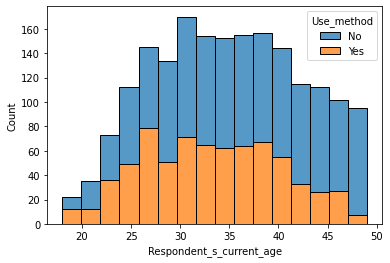

In [22]:
print(sns.histplot(data=df, x="Respondent_s_current_age", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


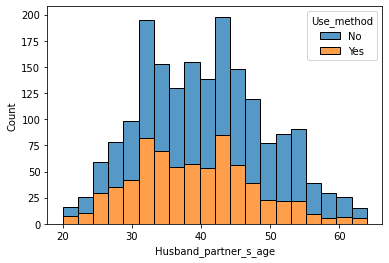

In [23]:
print(sns.histplot(data=df, x="Husband_partner_s_age", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


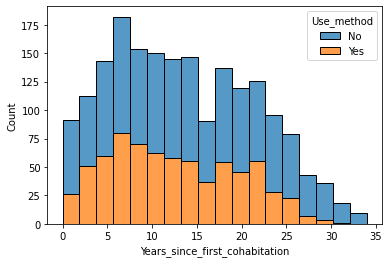

In [24]:
print(sns.histplot(data=df, x="Years_since_first_cohabitation", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


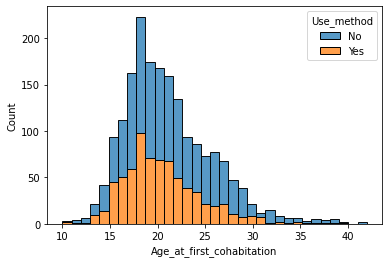

In [25]:
print(sns.histplot(data=df, x="Age_at_first_cohabitation", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


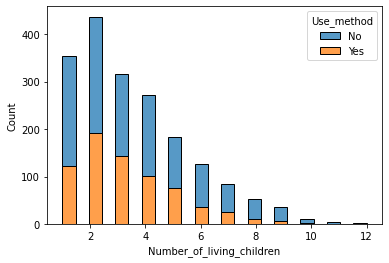

In [26]:
print(sns.histplot(data=df, x="Number_of_living_children", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


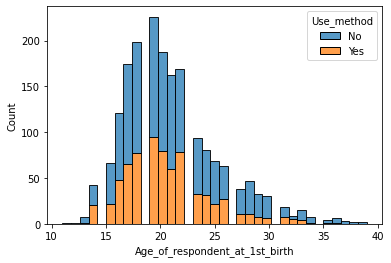

In [27]:
print(sns.histplot(data=df, x="Age_of_respondent_at_1st_birth", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


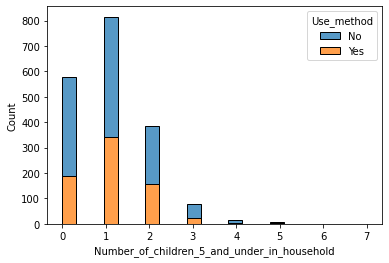

In [28]:
print(sns.histplot(data=df, x="Number_of_children_5_and_under_in_household", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


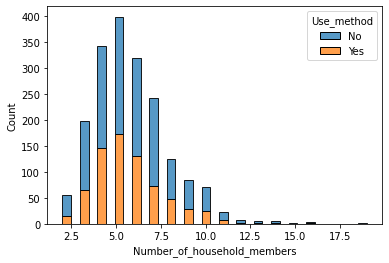

In [29]:
print(sns.histplot(data=df, x="Number_of_household_members", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


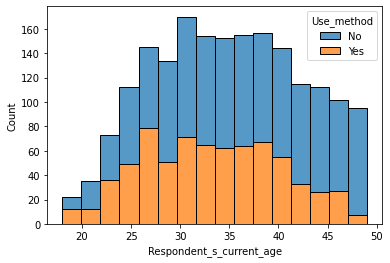

In [30]:
print(sns.histplot(data=df, x="Respondent_s_current_age", hue="Use_method", multiple="stack"))

Text(0.5, 1.0, 'Correlation HeatMap')

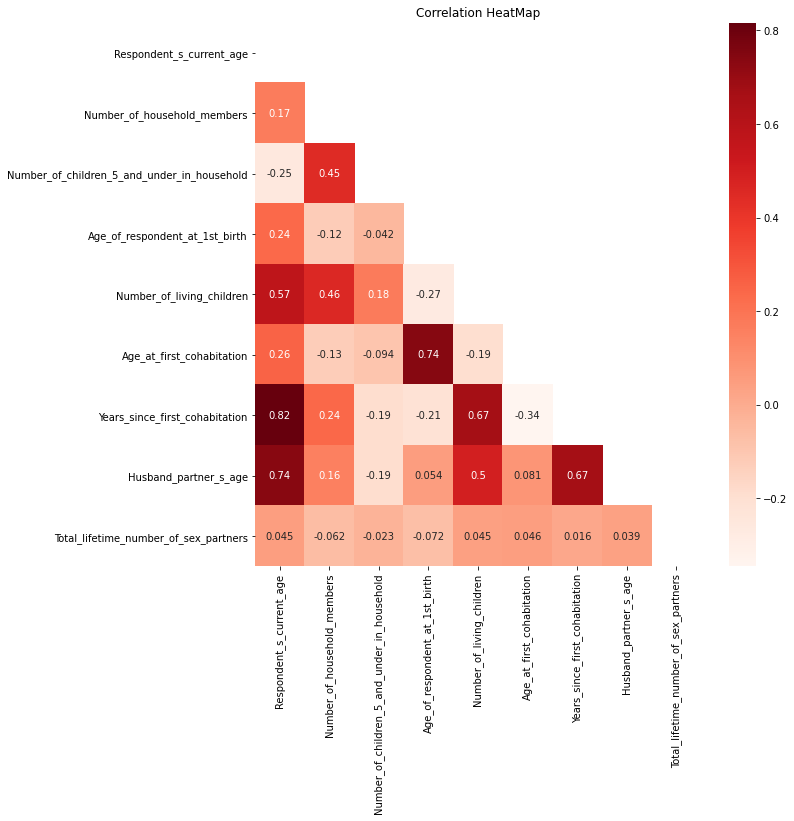

In [31]:
# creating mask
mask = np.triu(np.ones_like(df[num_cols].corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(df[num_cols].corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

## Analyze

* The correlation matrix shows that there is :
    * high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)

    * high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)

    * high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)

    * high correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)

 These correlations means they could have an identical impact on target variable);

    * We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;

In [32]:
drop_list=['Years_since_first_cohabitation', 'Husband_partner_s_age', 'Age_at_first_cohabitation']

In [33]:
df.drop(columns=drop_list, inplace=True)

In [34]:
num_cols=[x for x in num_cols if x not in drop_list]

In [35]:
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_lifetime_number_of_sex_partners']

##DATA TRANSFORMATION

In [36]:
for col in df.columns:
  print(f'{col}', df[col].unique())

Respondent_s_current_age [31 38 35 37 43 33 49 40 26 39 32 27 34 22 48 19 47 21 29 25 46 41 24 36
 42 20 28 45 23 30 44 18]
Region ['Sud' 'Aire Metropolitaine' 'Artibonite' "Grand'Anse" 'Nippes' 'Nord'
 'Rest-Ouest' 'Nord-Ouest' 'Centre' 'Nord-Est' 'Sud-Est']
Type_of_place_of_residence ['Rural' 'Urban']
Highest_educational_level ['Primary' 'Higher' 'Secondary' 'No education']
Religion ['Catholic' 'Protestant' 'No religion']
Number_of_household_members [ 4  5  6  7  3  9  2 14 12  8 10 11 19 15 13 16]
Number_of_children_5_and_under_in_household [2 1 0 4 3 5 7]
Wealth_index_combined ['Middle' 'Poorer' 'Richest' 'Poorest' 'Richer']
Age_of_respondent_at_1st_birth [19 31 23 18 21 24 20 17 16 26 25 13 28 27 15 22 32 29 14 30 33 34 11 36
 35 37 38 12 39]
Knowledge_of_ovulatory_cycle ['After period ended' 'Middle of the cycle' 'Before period begins'
 'At any time' 'During her period']
Number_of_living_children [ 3  2  5  4  8  1  6  9  7 11 10 12]
Current_contraceptive_method ['Not using' 'Inj

In [37]:
# categorical function to transform numeric columns
def cat_age(x, errors = "coerce"):
  if 18< x <=24:
    return '18-24'
  if 25 < x <= 31:
    return '25-31'
  if x > 32:
    return '+ 32'

''' bbbbbbbbb'''

def cat_memb(x, errors = "coerce"):
  if x < 4 :
    return 'Minus_than_4'
  if 4 <= x < 8:
    return '4-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_lifetime(x, errors = "coerce"):
  if x < 3:
    return 'Minus_than_3'
  if 3 <= x < 8:
    return '3-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_child(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

''' bbbbbbbbb'''
def cat_agebirth(x, errors = "coerce"):
  if x < 18:
    return 'Minus_than_18'
  if 18 <= x < 25:
    return '18-25'
  if x >= 25:
    return 'More_than_25'

''' bbbbbbbbb'''
def cat_livingchild(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

In [38]:
df['Respondent_s_current_age']=df['Respondent_s_current_age'].apply(cat_age)
df['Number_of_household_members']=df['Number_of_household_members'].apply(cat_memb)
df['Total_lifetime_number_of_sex_partners']=df['Total_lifetime_number_of_sex_partners'].apply(cat_lifetime)
df['Number_of_children_5_and_under_in_household']=df['Number_of_children_5_and_under_in_household'].apply(cat_child)
df['Age_of_respondent_at_1st_birth']=df['Age_of_respondent_at_1st_birth'].apply(cat_agebirth)
df['Number_of_living_children']=df['Number_of_living_children'].apply(cat_livingchild)
df.head()

Respondent_s_current_age               Region Type_of_place_of_residence Highest_educational_level  Religion Number_of_household_members  \
0                    25-31                  Sud                      Rural                   Primary  Catholic                         4-8   
1                     + 32                  Sud                      Rural                    Higher  Catholic                         4-8   
2                     + 32                  Sud                      Rural                 Secondary  Catholic                         4-8   
3                     + 32                  Sud                      Rural                 Secondary  Catholic                         4-8   
4                     + 32  Aire Metropolitaine                      Urban                 Secondary  Catholic                         4-8   

  Number_of_children_5_and_under_in_household Wealth_index_combined Age_of_respondent_at_1st_birth Knowledge_of_ovulatory_cycle  \
0                                         2-4                Middle                          18-25           After period ended   
1                                Minus_than_2                Middle                   More_than_25          Middle of the cycle   
2                                Minus_than_2                Middle                          18-25           After period ended   
3                                Minus_than_2                Poorer                          18-25           After period ended   
4                                Minus_than_2               Richest                          18-25           After period ended   

  Number_of_living_children Current_contraceptive_method Current_use_by_method_type At_health_facility_told_of_family_planning  \
0                       2-4                    Not using                  No method                                         No   
1                       2-4                   Injections              Modern method                                         No   
2                       2-4                   Injections              Modern method                                         No   
3               More_than_4                   Injections              Modern method                                         No   
4                       2-4                    Not using                  No method                                         No   

  Contraception_is_woman_s_business_man_should_not_worry Women_who_use_contraception_become_promiscuous Fertility_preference  \
0                                           Disagree                                           Disagree              No more   
1                                              Agree                                           Disagree              No more   
2                                           Disagree                                           Disagree         Have another   
3                                              Agree                                              Agree              No more   
4                                           Disagree                                           Disagree              No more   

        Husband_partner_s_occupation Respondent_currently_working Respondent_earns_more_than_husband_partner Total_lifetime_number_of_sex_partners  \
0  Professional/technical/managerial                          Yes                             About the same                          Minus_than_3   
1  Professional/technical/managerial                          Yes                              Less than him                          Minus_than_3   
2                     Skilled manual                          Yes                              Less than him                          Minus_than_3   
3       Agricultural - self employed                           No                              Less than him                          Minus_than_3   
4  Professional/technical/managerial                          

In [39]:
# Replace and regrouppimg modalities
df['Husband_partner_s_occupation']=df['Husband_partner_s_occupation'].replace({"Professional/technical/managerial": "professional_technical_managerial", "Sales": "professional_technical_managerial", "Skilled manual": "professional_technical_managerial", 'Agricultural - self employed':'Agricultural_or_Self_employed','Household and domestic':'Domestic_Unskilled', "Unskilled manual": "Domestic_Unskilled"})
df['Husband_partner_s_occupation'].unique()

array(['professional_technical_managerial',
       'Agricultural_or_Self_employed', 'Domestic_Unskilled'],
      dtype=object)

In [40]:
# count column values again
for col in df.columns:
  print(f"{col}={df[col].nunique()}")

Respondent_s_current_age=3
Region=11
Type_of_place_of_residence=2
Highest_educational_level=4
Religion=3
Number_of_household_members=3
Number_of_children_5_and_under_in_household=3
Wealth_index_combined=5
Age_of_respondent_at_1st_birth=3
Knowledge_of_ovulatory_cycle=5
Number_of_living_children=3
Current_contraceptive_method=5
Current_use_by_method_type=2
At_health_facility_told_of_family_planning=2
Contraception_is_woman_s_business_man_should_not_worry=2
Women_who_use_contraception_become_promiscuous=3
Fertility_preference=2
Husband_partner_s_occupation=3
Respondent_currently_working=2
Respondent_earns_more_than_husband_partner=3
Total_lifetime_number_of_sex_partners=3
Use_method=2


In [41]:
select=['Region','Religion','Type_of_place_of_residence','Highest_educational_level', 'Number_of_household_members','Number_of_children_5_and_under_in_household','Number_of_living_children','Age_of_respondent_at_1st_birth','At_health_facility_told_of_family_planning','Contraception_is_woman_s_business_man_should_not_worry','Women_who_use_contraception_become_promiscuous','Fertility_preference','Respondent_currently_working','Respondent_earns_more_than_husband_partner','Husband_partner_s_occupation','Wealth_index_combined','Knowledge_of_ovulatory_cycle','Current_contraceptive_method','Total_lifetime_number_of_sex_partners','Use_method']

In [42]:
df[select].head()

Region  Religion Type_of_place_of_residence Highest_educational_level Number_of_household_members  \
0                  Sud  Catholic                      Rural                   Primary                         4-8   
1                  Sud  Catholic                      Rural                    Higher                         4-8   
2                  Sud  Catholic                      Rural                 Secondary                         4-8   
3                  Sud  Catholic                      Rural                 Secondary                         4-8   
4  Aire Metropolitaine  Catholic                      Urban                 Secondary                         4-8   

  Number_of_children_5_and_under_in_household Number_of_living_children Age_of_respondent_at_1st_birth At_health_facility_told_of_family_planning  \
0                                         2-4                       2-4                          18-25                                         No   
1                                Minus_than_2                       2-4                   More_than_25                                         No   
2                                Minus_than_2                       2-4                          18-25                                         No   
3                                Minus_than_2               More_than_4                          18-25                                         No   
4                                Minus_than_2                       2-4                          18-25                                         No   

  Contraception_is_woman_s_business_man_should_not_worry Women_who_use_contraception_become_promiscuous Fertility_preference  \
0                                           Disagree                                           Disagree              No more   
1                                              Agree                                           Disagree              No more   
2                                           Disagree                                           Disagree         Have another   
3                                              Agree                                              Agree              No more   
4                                           Disagree                                           Disagree              No more   

  Respondent_currently_working Respondent_earns_more_than_husband_partner       Husband_partner_s_occupation Wealth_index_combined  \
0                          Yes                             About the same  professional_technical_managerial                Middle   
1                          Yes                              Less than him  professional_technical_managerial                Middle   
2                          Yes                              Less than him  professional_technical_managerial                Middle   
3                           No                              Less than him      Agricultural_or_Self_employed                Poorer   
4                          Yes                              Less than him  professional_technical_managerial               Richest   

  Knowledge_of_ovulatory_cycle Current_contraceptive_method Total_lifetime_number_of_sex_partners Use_method  
0           After period ended                    Not using                          Minus_than_3         No  
1          Middle of the cycle                   Injections                          Minus_than_3        Yes  
2           After period ended                   Injections                          Minus_than_3        Yes  
3           After period ended                   Injections                          Minus_than_3        Yes  
4           After period ended                    Not using                                   3-8         No

In [43]:
df1 = df[df['Use_method']=='Yes']
analiz = df1.groupby(by=['Use_method','Number_of_living_children','Fertility_preference']).size().to_frame()
analiz.columns = ['Total']
analiz['%'] = analiz/analiz.Total.sum()*100
analiz

Total     %
Use_method Number_of_living_children Fertility_preference             
Yes        2-4                       Have another             89 12.43
                                     No more                 246 34.36
           Minus_than_2              Have another            107 14.94
                                     No more                  16  2.23
           More_than_4               Have another             10  1.40
                                     No more                 248 34.64

In [44]:
df.dtypes

Respondent_s_current_age                      object
Region                                        object
Type_of_place_of_residence                    object
Highest_educational_level                     object
Religion                                      object
                                               ...  
Husband_partner_s_occupation                  object
Respondent_currently_working                  object
Respondent_earns_more_than_husband_partner    object
Total_lifetime_number_of_sex_partners         object
Use_method                                    object
Length: 22, dtype: object

In [45]:
binary_cols = [col for col in df.columns if df[col].nunique() == 2]
binary_cols

['Type_of_place_of_residence',
 'Current_use_by_method_type',
 'At_health_facility_told_of_family_planning',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Fertility_preference',
 'Respondent_currently_working',
 'Use_method']

In [46]:
multi_cols = [col for col in df.columns if df[col].nunique() > 2]
multi_cols

['Respondent_s_current_age',
 'Region',
 'Highest_educational_level',
 'Religion',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Wealth_index_combined',
 'Age_of_respondent_at_1st_birth',
 'Knowledge_of_ovulatory_cycle',
 'Number_of_living_children',
 'Current_contraceptive_method',
 'Women_who_use_contraception_become_promiscuous',
 'Husband_partner_s_occupation',
 'Respondent_earns_more_than_husband_partner',
 'Total_lifetime_number_of_sex_partners']

In [47]:
df.columns

Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners', 'Use_method'],
      dtype='object')

In [48]:
for col in df.columns:
  if df[col].dtype == "object":
    df[col] = df[col].astype('category')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1878 entries, 0 to 1877
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype   
---  ------                                                  --------------  -----   
 0   Respondent_s_current_age                                1732 non-null   category
 1   Region                                                  1878 non-null   category
 2   Type_of_place_of_residence                              1878 non-null   category
 3   Highest_educational_level                               1878 non-null   category
 4   Religion                                                1878 non-null   category
 5   Number_of_household_members                             1878 non-null   category
 6   Number_of_children_5_and_under_in_household             1878 non-null   category
 7   Wealth_index_combined                                   1878 non-null   category
 8   Age_of_respondent_at_1st_bir

## BIVARIATE

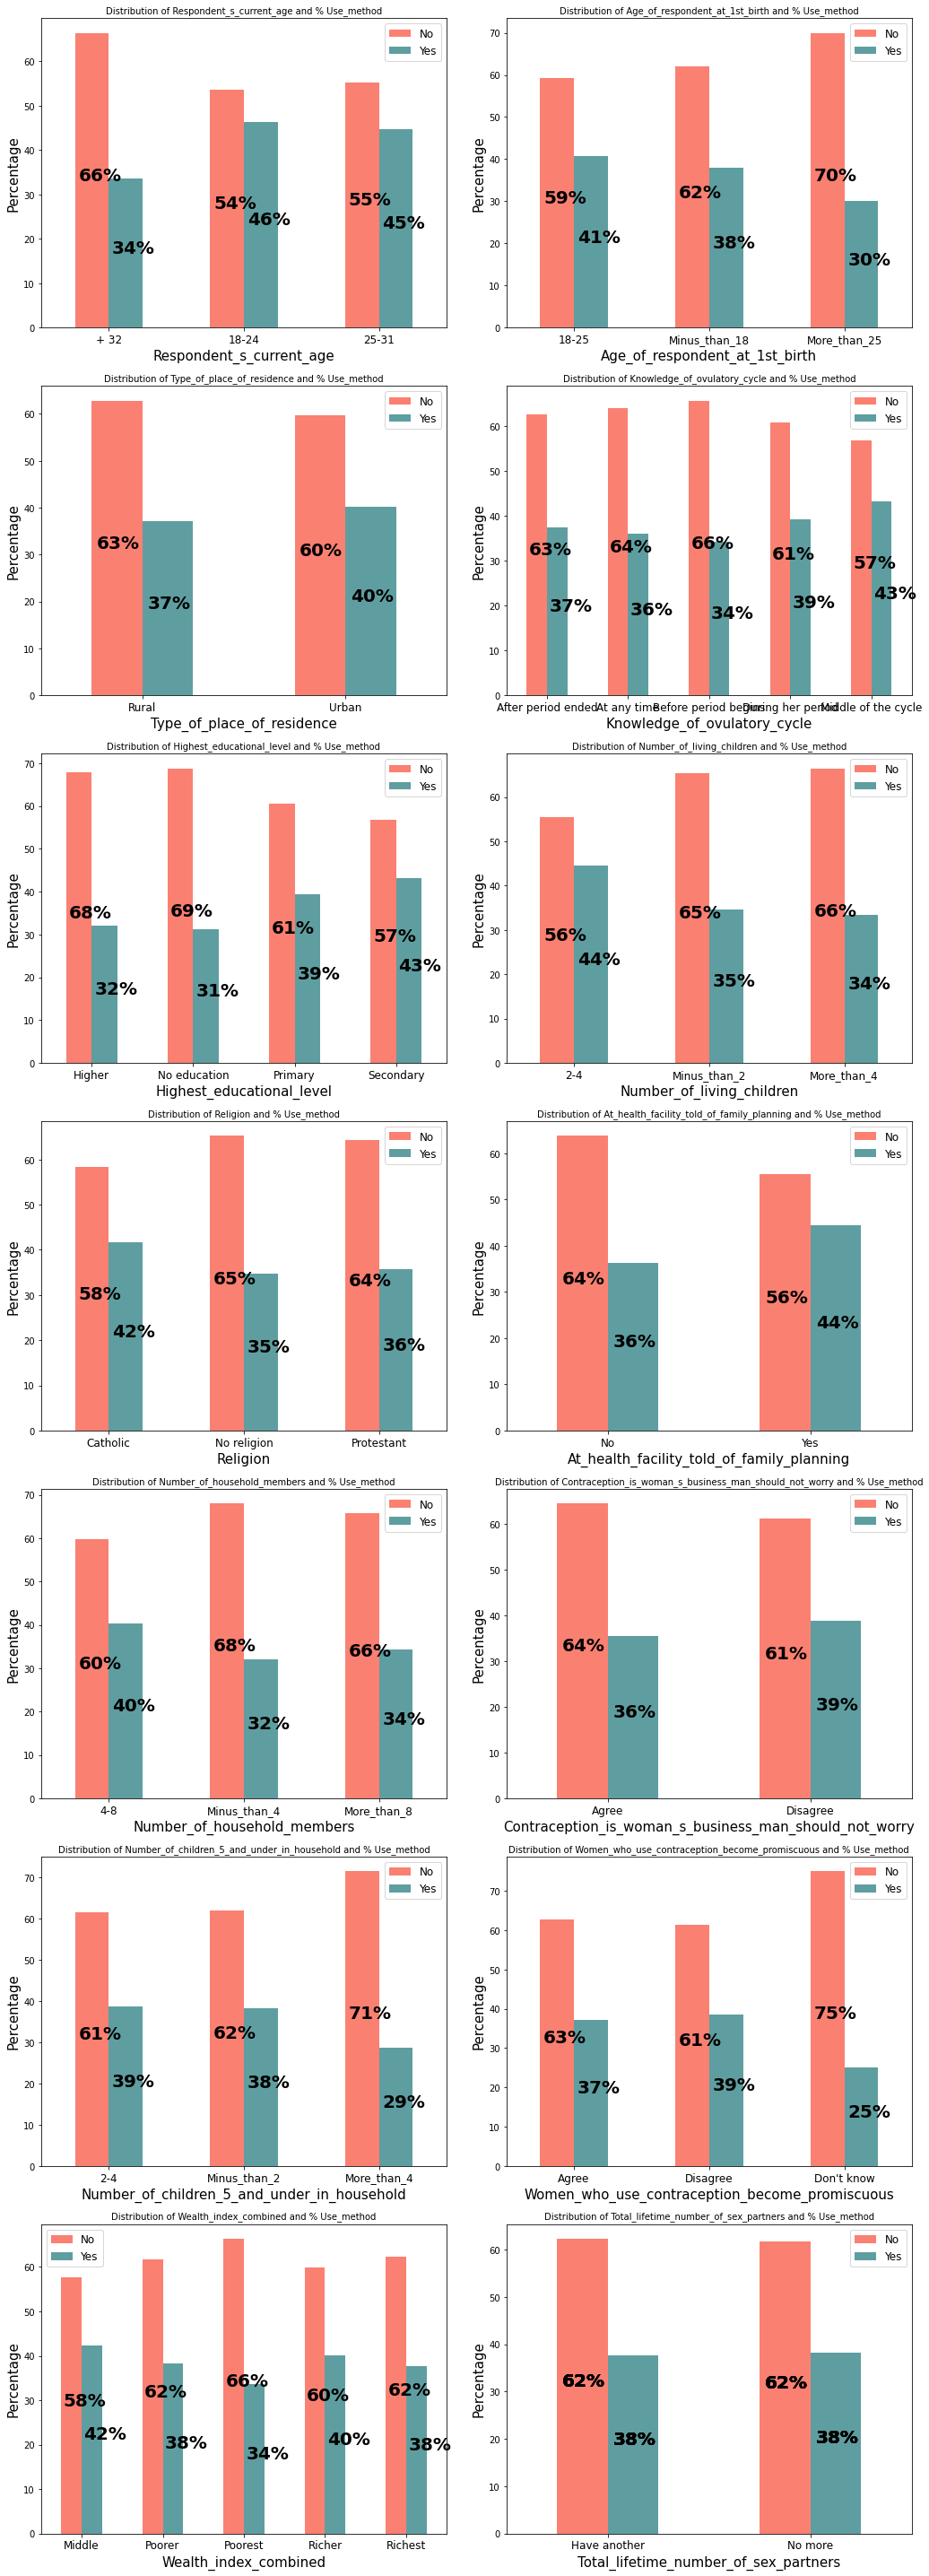

In [50]:

#draw bar plot for insights from categorical variables
cate_cols = ['Respondent_s_current_age', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners']
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 7,ncols = 2,figsize = (15,40))

for i,feature in enumerate(cate_cols):
    if i < 7:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 7 and i < 14:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-7,1])
    
    ax.set_title("Distribution of {} and % Use_method".format(feature), fontsize = 10)
    ax.set_ylabel("Percentage", fontsize=15)
    ax.set_xlabel("{}".format(feature), fontsize=15)
    ax.legend(["No", "Yes"], fontsize=12)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [51]:
# transform variables in dummies
data = pd.get_dummies(df)
data.head()

Respondent_s_current_age_+ 32  Respondent_s_current_age_18-24  Respondent_s_current_age_25-31  Region_Aire Metropolitaine  Region_Artibonite  \
0                              0                               0                               1                           0                  0   
1                              1                               0                               0                           0                  0   
2                              1                               0                               0                           0                  0   
3                              1                               0                               0                           0                  0   
4                              1                               0                               0                           1                  0   

   Region_Centre  Region_Grand'Anse  Region_Nippes  Region_Nord  Region_Nord-Est  Region_Nord-Ouest  Region_Rest-Ouest  Region_Sud  Region_Sud-Est  \
0              0                  0              0            0                0                  0                  0           1               0   
1              0                  0              0            0                0                  0                  0           1               0   
2              0                  0              0            0                0                  0                  0           1               0   
3              0                  0              0            0                0                  0                  0           1               0   
4              0                  0              0            0                0                  0                  0           0               0   

   Type_of_place_of_residence_Rural  Type_of_place_of_residence_Urban  Highest_educational_level_Higher  Highest_educational_level_No education  \
0                                 1                                 0                                 0                                       0   
1                                 1                                 0                                 1                                       0   
2                                 1                                 0                                 0                                       0   
3                                 1                                 0                                 0                                       0   
4                                 0                                 1                                 0                                       0   

   Highest_educational_level_Primary  Highest_educational_level_Secondary  Religion_Catholic  Religion_No religion  Religion_Protestant  \
0                                  1                                    0                  1                     0                    0   
1                                  0                                    0                  1                     0                    0   
2                                  0                                    1                  1                     0                    0   
3                                  0                                    1                  1                     0                    0   
4                                  0                                    1                  1                     0                    0   

   Number_of_household_members_4-8  Number_of_household_members_Minus_than_4  Number_of_household_members_More_than_8  \
0                                1                                         0                                        0   
1                                1                                         0                                        0   
2                                1                                         0                                        0   
3                

In [52]:
# Function in order to transfrom df in numrical data only
def label_encoder(dataframe, cat_cols):
    labelencoder = preprocessing.LabelEncoder()
    dataframe[cat_cols] = labelencoder.fit_transform(dataframe[cat_cols])
    return dataframe

In [53]:
data.columns

Index(['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31', 'Region_Aire Metropolitaine',
       'Region_Artibonite', 'Region_Centre', 'Region_Grand'Anse', 'Region_Nippes', 'Region_Nord', 'Region_Nord-Est', 'Region_Nord-Ouest',
       'Region_Rest-Ouest', 'Region_Sud', 'Region_Sud-Est', 'Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_ind

In [54]:
selec=['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31','Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer', 'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Age_of_respondent_at_1st_birth_18-25', 'Age_of_respondent_at_1st_birth_Minus_than_18',
       'Age_of_respondent_at_1st_birth_More_than_25', 'Knowledge_of_ovulatory_cycle_After period ended', 'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins', 'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle', 'Number_of_living_children_2-4', 'Number_of_living_children_Minus_than_2',
       'Number_of_living_children_More_than_4', 'At_health_facility_told_of_family_planning_No',
       'At_health_facility_told_of_family_planning_Yes', 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree', 'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree', "Women_who_use_contraception_become_promiscuous_Don't know",
       'Fertility_preference_Have another', 'Fertility_preference_No more', 'Husband_partner_s_occupation_Agricultural_or_Self_employed',
       'Husband_partner_s_occupation_Domestic_Unskilled', 'Husband_partner_s_occupation_professional_technical_managerial',
       'Respondent_currently_working_No', 'Respondent_currently_working_Yes', 'Respondent_earns_more_than_husband_partner_About the same',
       'Respondent_earns_more_than_husband_partner_Less than him', 'Respondent_earns_more_than_husband_partner_More than him',
       'Total_lifetime_number_of_sex_partners_3-8', 'Total_lifetime_number_of_sex_partners_Minus_than_3',
       'Total_lifetime_number_of_sex_partners_More_than_8']

In [55]:
# Installing package for colored text
import sys
from termcolor import colored, cprint

In [56]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, data.Use_method_Yes))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [57]:
    #else: 
    # print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [58]:
for i in data[selec].columns:
  #for v in [0.0000, 0.0499]:
    #if v < p:
  chisq(data[i],i)

We can reject the Null Hypothesis for Respondent_s_current_age_+ 32  1.8521318106538768e-06
We can reject the Null Hypothesis for Respondent_s_current_age_18-24  0.021089780741436744
We can reject the Null Hypothesis for Respondent_s_current_age_25-31  0.0010928257325066501
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Rural 0.22032231320227874
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Urban 0.22032231320227874
We fail to reject the Null Hypothesis for Highest_educational_level_Higher 0.4259210297298147
We can reject the Null Hypothesis for Highest_educational_level_No education  0.00024397217765052934
We fail to reject the Null Hypothesis for Highest_educational_level_Primary 0.3892722032221576
We can reject the Null Hypothesis for Highest_educational_level_Secondary  0.0036153875869754356
We can reject the Null Hypothesis for Religion_Catholic  0.008418068236999013
We fail to reject the Null Hypothesis for Religion_No religion 0.50749

In [59]:
selected=['Respondent_s_current_age_+ 32', 
          'Respondent_s_current_age_18-24',
          'Respondent_s_current_age_25-31',
          'Region_Rest-Ouest',
          'Highest_educational_level_No education',
          'Highest_educational_level_Secondary',
          'Religion_Catholic',
          'Religion_Protestant',
          'Number_of_household_members_4-8',
          'Number_of_household_members_Minus_than_4',
          'Wealth_index_combined_Poorest',
          'Age_of_respondent_at_1st_birth_18-25',
          'Age_of_respondent_at_1st_birth_More_than_25',
          'Number_of_living_children_2-4',
          'Number_of_living_children_More_than_4',
          'Knowledge_of_ovulatory_cycle_Middle of the cycle',
          'At_health_facility_told_of_family_planning_Yes',
          'At_health_facility_told_of_family_planning_No',
          'Respondent_earns_more_than_husband_partner_Less than him',
          'Total_lifetime_number_of_sex_partners_3-8',
          'Total_lifetime_number_of_sex_partners_Minus_than_3',
          'Use_method_Yes']

In [60]:
contracep=data[selected]

In [61]:
import statsmodels.api as sm
X = contracep.drop('Use_method_Yes', axis=1)
y = contracep['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 99.931650
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1857
Method:                           MLE   Df Model:                           20
Date:                Mon, 13 Sep 2021   Pseudo R-squ.:                     inf
Time:                        03:21:59   Log-Likelihood:            -1.8767e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Respondent_s_cu

In [62]:
# reg=['Region_Rest-Ouest','Number_of_living_children_2-4','At_health_facility_told_of_family_planning_Yes','Use_method_Yes']

## MACHINE LEARNING

In [63]:
# Let's split the dataset
X = contracep.drop('Use_method_Yes', axis=1)
y = contracep['Use_method_Yes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=30)
lr  = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

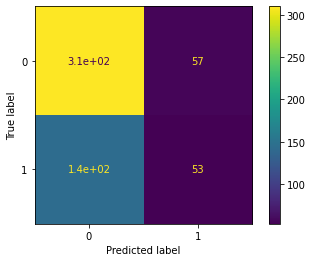

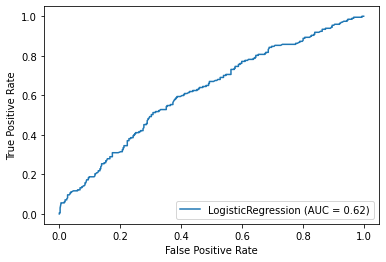

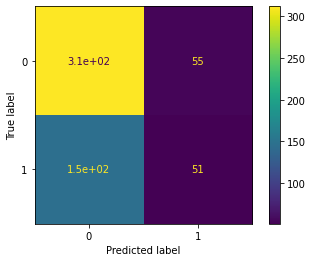

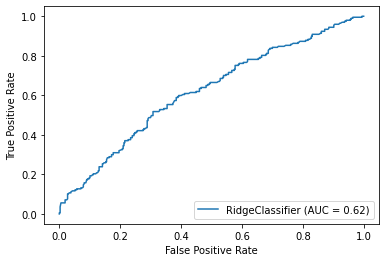

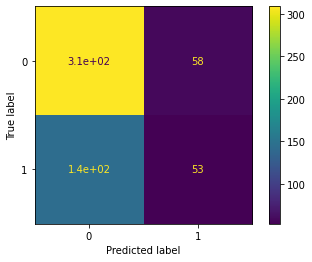

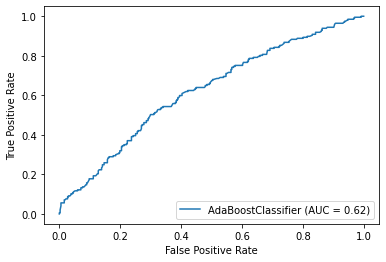

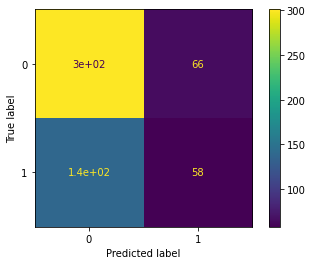

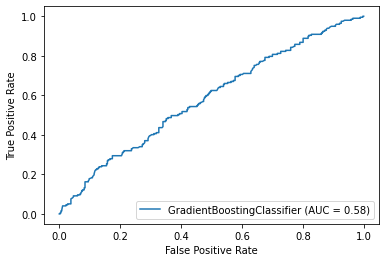

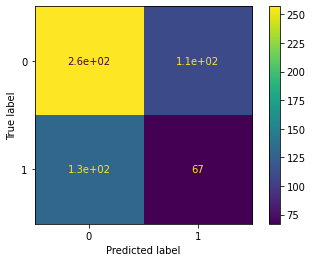

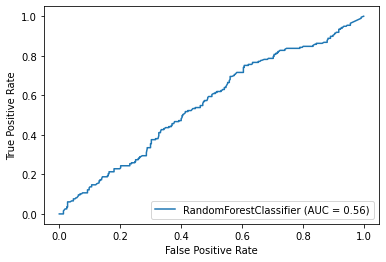

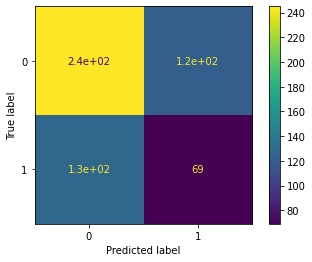

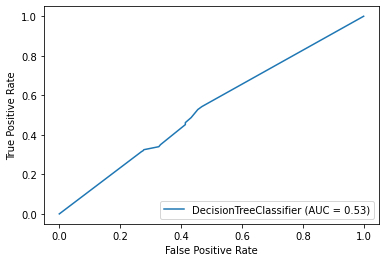

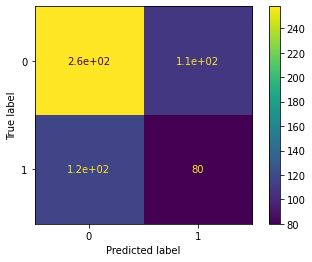

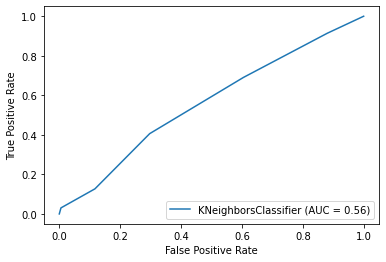

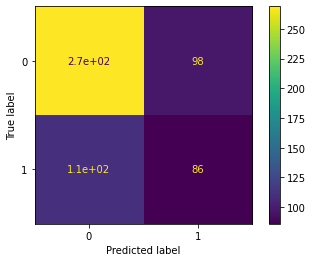

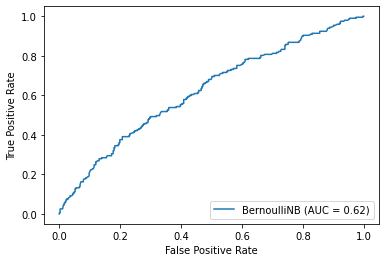

In [64]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train,y_train)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

contraception = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [65]:
# Table of machine learning models with high accuracy
contraception

names  scores  times
0          LogisticRegression    0.64   0.03
1             RidgeClassifier    0.64   0.02
2          AdaBoostClassifier    0.64   0.15
3  GradientBoostingClassifier    0.64   0.17
4      RandomForestClassifier    0.57   0.23
5      DecisionTreeClassifier    0.56   0.00
6        KNeighborsClassifier    0.60   0.01
7                  NaiveBayes    0.63   0.00

In [66]:
# Classification table
from sklearn.metrics import classification_report
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.84      0.76       367
           1       0.48      0.27      0.35       197

    accuracy                           0.64       564
   macro avg       0.58      0.56      0.55       564
weighted avg       0.61      0.64      0.61       564



In [67]:
# Let's try to balance the data
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [68]:
# Let's fit the model with the balanced data
lr  = LogisticRegression()
lr.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
# Let's see how the new classification table would be with the balanced data
y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.75      0.73       367
           1       0.47      0.41      0.44       197

    accuracy                           0.63       564
   macro avg       0.59      0.58      0.58       564
weighted avg       0.62      0.63      0.63       564



### Further Analysis will come sooner